# Laboratorio de Introducción al Procesamiento de Lenguaje Natural

## Tarea 1

El objetivo de este laboratorio es probar diferentes herramientas de PLN sobre un corpus de tweets, que se utilizará en la segunda tarea para entrenar un clasificador para Análisis de Sentimiento.

### Entrega
Deberán entregar un archivo *.ipynb* con su solución, que incluya código, discusiones y conclusiones del trabajo. 

El plazo de entrega de la tarea 1 cierra el **8 de mayo a las 23:59 horas**.

### Instalación de bibliotecas
Antes de empezar, ejecutamos la siguiente celda para instalar una biblioteca que vamos a necesitar.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install spacy

# Parte 1 - Carga y preprocesamiento del corpus

Hay muchas formas de trabajar con conjuntos de datos (por ejemplo con [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)), en esta tarea vamos a utilizar la biblioteca [csv](https://docs.python.org/3/library/csv.html). El resultado será una lista de n-uplas, cada una de las cuales correponde a una fila del .csv (incluso el cabezal, la primera línea).


In [ ]:
import csv
import random

# Constantes de Google Drive
# IMPORTANTE!!! EDITAR ESTA RUTA SI EL CORPUS NO ESTA EN LA RAIZ DEL GOOGLE DRIVE
CSV_PATH = '/content/drive/MyDrive/train.csv'

# Carga del archivo train.csv

with open(CSV_PATH, newline='', encoding="utf-8") as corpus_csv:
  reader = csv.reader(corpus_csv)
  next(reader) # Saltea el cabezal del archivo
  train_set = [x for x in reader]

# Elegir un tweet aleatorio e imprimirlo junto a su categoría

random_tweet = random.choice(train_set)
print(f"El tweet es: {random_tweet[1]}")
print(f"y su categoría: {random_tweet[2]}")

El tweet es: DRAE sobre "extorsión" al margen de conveniencias políticas: http://t.co/gfPnSyif
y su categoría: NONE


Una vez cargado el corpus, que por tratarse de un conjunto de tweets tiene características particulares, deben analizar varios ejemplos para definir qué preprocesamiento consideran necesario. Algunos ejemplos de limpieza de los datos que puede ser interesante aplicar:

* Eliminar url o remplazarlas por algo genérico, como el texto "(URL)" (*La juez envía a prisión al exdirector de Trabajo andaluz imputado por el caso de los ERE falsos http://t.co/OadFKKj2) -> La juez envía a prisión al exdirector de Trabajo andaluz imputado por el caso de los ERE falsos **(URL)** )*

* Remplazar menciones a usuarios por algo genérico, como "USUARIO" (*@earthlymama15 ahi voy , cambiando hábitos y haciendo un nuevo estilo de vida -> **USUARIO** ahi voy , cambiando hábitos y haciendo un nuevo estilo de vida*)

* Remplazar abreviaturas comunes por el término original (*A los okupas no les gusta el edificio de Concepcion Jeronima xq esta en obras. -> A los okupas no les gusta el edificio de Concepcion Jeronima **porque** esta en obras.*)

* Homogeneizar algunas expresiones frencuentes en este tipo de texto, como risas (*@LaMachaCR Ve que sos de las pocas positivas en mi TL, no me decepciones jajaja. -> @LaMachaCR Ve que sos de las pocas positivas en mi TL, no me decepciones **jaja**. // @ViKo_LH mira hijo de puta me cago en tu puta madre JAJAJAJAJAJAJJAAJAJA ya podré ir en 2018, ya...  -> @ViKo_LH mira hijo de puta me cago en tu puta madre **jaja** ya podré ir en 2018, ya...*) 

A continuación mostramos algunos ejemplos de uso de la biblioteca [re](https://docs.python.org/3/library/re.html) para trabajar con expresiones regulares (no es obligatorio usarla).

In [ ]:
# ejemplos de sustituciones usando expresiones regulares
import re

oracion = 'jojjijijjaja'
print(oracion)
oracion = re.sub('([j|a]{1}[aeioujs]{3,}|[h|a]{1}[aeiouhs]{3,})\w*', 'jaja', oracion)
oracion = re.sub('#\w+', 'HASHTAG', oracion)
print(oracion)


jojjijijjaja
jaja


## Preprocesamiento de los Tweets.

### Problema

El conjunto de textos que se quiere analizar contiene datos no estructurados y no procesados que dificultan la aplicación de técnicas de procesamiento de lenguaje natural.

Esta dinamica responde a la naturaleza de Twitter, una red social de caracter informal donde se pueden encontrar de los mas diversos "posteos", la idea de este pre-procesado es unificar criterios y disminuir el ruido que este entorno provee.

### Solución:

Se propone aplicar una serie de técnicas de pre-procesamiento para limpiar y homogeneizar los datos del corpus. La aplicación de estas técnicas facilitará el análisis posterior del corpus y mejorará la calidad de los resultados obtenidos. Las tecnicas en cuestion:

- `remove_urls`: Remplaza las URLs en un string con el string "".
- `remove_hashtags`: Remplaza los hashtags en un string con el string "Hashtag".
- `remove_mentions`: Remplaza las menciones a usuarios en un string con el string "Usuario". Notar que los tweets al ser respondidos a otro usuario siempre llevan el ':' despues de la mención, consideramos esto dentro de la regex.
- `remove_numbers`: Remplaza los números en un string con el string "NUM".
- `remove_abbreviations`: Remplaza las abreviaciones comunes del español en un string con el término original, utilizando un diccionario predefinido.
- `remove_repeated_symbols`: Remueve caracteres repetidos más de dos veces en un string.
- `remove_laughts`: Remplaza diferentes expresiones de "risas" con el string "jaja".



In [ ]:
# Código de los estudiantes para resolver la parte 1
import re

# Funciones
## Remplaza urls con URL
def remove_urls(x=str): return re.sub('((https|http)?://|www\.)\S+', '', x)

## Remplaza hashtagas con HASHTAG
def remove_hashtags(x=str): return re.sub('#\w+', 'Hashtag', x)

## Remplaza @usuario con USER
def remove_mentions(x=str): return re.sub('@\w+(\:?)', 'Usuario', x)

## Remplaza secuencia de digitos con NUM
def remove_numbers(x=str): return re.sub(r'\d{1,3}(?:\.\d{3})*', 'NUM', x)

## Remplaza abreviaciones tipicas del espanol.
def remove_abbreviations(text: str) -> str:
  ABBREVIATIONS = {
    r"\b1ro\b": "primero",
    r"\b2do\b": "segundo",
    r"\b3ro\b": "tercero",
    r"\bbna\b": "buena",
    r"\bbnas\b": "buenas",
    r"\bbno\b": "bueno",
    r"\bbnos\b": "buenos",
    r"\bcm\b": "como",
    r"\bd\b": "de",
    r"\bdr\b(\.?)": "doctor",
    r"\bdnd\b": "donde",
    r"\bgral\b(\.?)": "general",
    r"\bhdp\b": "hijo de puta",
    r"\bhla\b": "hola",
    r"\bls\b": "los",
    r"\bm\b": "me",
    r"\bomg\b": "oh mi dios",
    r"\bp\b": "puede",
    r"\bpq\b": "por qué",
    r"\bq\b": "que",
    r"\bq tal\b": "qué tal",
    r"\bsts\b": "estás",
    r"\btb\b": "también",
    r"\btmb\b": "también",
    r"\bt\b": "te",
    r"\btd\b": "todo",
    r"\btds\b": "todos",
    r"\bwtf\b": "que carajos",
    r"\bx\b": "por",
    r"\bxfa\b": "por favor",
    r"\bxq\b": "porque"
}

  for abbr, full_word in ABBREVIATIONS.items():
      text = re.sub(abbr, full_word, text, flags=re.IGNORECASE)

  return text
  
## Remplaza caracteres repetidos mas de dos veces
def remove_rep_symbols(x=str): return re.sub(r'(\w)\1{2,}', r'\1', x)

## Remplaza diferentes onomatopeya de 'risas'
def remove_laughts(x=str): return re.sub(r'([j|a]{1}[aeioujs]{3,}|[h|a]{1}[aeiouhs]{3,})\w*', 'jaja', x)



## Bucle Principal
Este código aplica el conjunto de funciones predefinidas anteriorment a un corpus. Cada función elimina o transforma un aspecto específico de los tweets.

Después de aplicar cada función, el código evalúa los cambios y actualiza estadísticas sobre cuántos tweets fueron impactados por cada función. La frecuencia relativa de cada función se calcula al dividir el número de tweets impactados por el total.

El código también imprime información sobre un tweet al azar del corpus antes y después de aplicar el conjunto de funciones, así como una puntuación de qué funciones específicas afectaron al tweet.

In [ ]:
import matplotlib.pyplot as plt
import pdb
import random

# Constantes Ejercicio
## Tweets del train set

TWEETS = [x[1] for x in train_set]

## Arreglo de funciones definidas anteriormente que se aplican a los tweets
PIPELINE = [     
  remove_urls,
  remove_mentions,  
  remove_hashtags,
  remove_numbers,  
  remove_abbreviations,
  remove_laughts,
  remove_rep_symbols
]
## Lista con el nro de tweets impactados.
accounting = dict(zip([f.__name__ for f in PIPELINE], [0] * len(PIPELINE)))
## funciones aplicadas a un tweet, 
tweets_score = [([0] * len(PIPELINE)) for _ in range(len(TWEETS))]

# Bucle principal
## Para cada tweet del corpus se aplica el pipeline de funciones
## Luego de aplicar una funcion se evaluan los cambios y se actualizan las estadisticas.
for i, tweet in enumerate(TWEETS):
    for j, regex in enumerate(PIPELINE):
        aux = str(tweet)
        tweet = regex(tweet)

        if aux != tweet:
          accounting[regex.__name__] += 1
          tweets_score[i][j] = 1
        
    TWEETS[i] = tweet

## Dividimos por el total para tener una frecuencia relativa
for k, v in accounting.items(): accounting[k] = round(v/len(TWEETS)*100, 4)

In [ ]:
## Indice de un tweet al azar
random_tweet_index = random.randint(0, len(TWEETS)-1)

## Escojer un tweet con score especifico
while tweets_score[random_tweet_index][6] != 1:
  random_tweet_index = random.randint(0, len(TWEETS)-1)

print('-----------------Random Tweet-------------------------------')
print()
print(f'[Original  - {random_tweet_index}] : {train_set[random_tweet_index][1]}')
print(f'[Pipelined - {random_tweet_index}] : {TWEETS[random_tweet_index]}')
print(f'[Score     - {random_tweet_index}] : {tweets_score[random_tweet_index]}')
print(f'[Acc] : {accounting}')
print()

-----------------Random Tweet-------------------------------

[Original  - 1913] : "@Labrujulacom: Desde nuestra pequeña agencia estamos deslumbrados por tu libro, we want more!! :) thanks xxx" URwelcome!
[Pipelined - 1913] : "Usuario Desde nuestra pequeña agencia estamos deslumbrados por tu libro, we want more!! :) thanks x" URwelcome!
[Score     - 1913] : [0, 1, 0, 0, 0, 0, 1]
[Acc] : {'remove_urls': 23.1657, 'remove_mentions': 42.9276, 'remove_hashtags': 15.6002, 'remove_numbers': 17.2721, 'remove_abbreviations': 8.9247, 'remove_laughts': 6.6153, 'remove_rep_symbols': 1.9485}



## Comentario Final

El código presentado propone una solución para el preprocesamiento de un corpus de tweets. Se aplican una serie de transformaciones al texto original y se incluyen estadísticas para evaluar el impacto de cada transformación del pipeline en el corpus. Es importante tener en cuenta que al tratarse de un pipeline, las funciones aplicadas pueden sesgarse entre sí. 

Por ejemplo, aplicar la transformación remove_url primero podría afectar el funcionamiento de otras debido a que una URL puede contener números y caracteres repetidos que podrían ser detectados por las otras. Sin embargo, en algunos casos (como este) aplicar remove_url primero podría ser beneficioso, ya que los valores dentro de una URL generalmente no son relevantes para el análisis.

Otro problema a considerar es el correcto diseño de las regex, dado que una muy general o laxa podría generar un número alto de falsos positivos e invalidar las frecuencias graficadas.

El uso de un gráfico de barras para visualizar las estadísticas resulta útil para comparar el impacto de cada transformación y para identificar las transformaciones más relevantes para el corpus en cuestión.

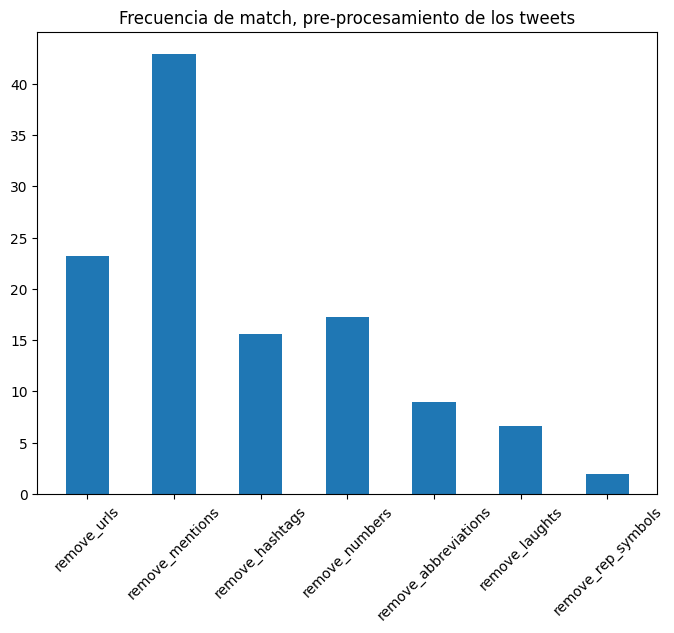

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(accounting.keys(), accounting.values(), width=0.5)
ax.set_title('Frecuencia de match, pre-procesamiento de los tweets')
ax.set_xticks(range(len(accounting)))
ax.set_xticklabels(accounting.keys(), rotation=45)
ax.set_yticks(range(0, int(max(accounting.values())), 5))
plt.show()

# Parte 2 - Herramientas de análisis lingüístico

Vamos a usar la biblioteca [Spacy](https://spacy.io/) (en particular, funciones para [análisis lingüístico](https://spacy.io/usage/linguistic-features)) para obtener informaicón lingüística de las palabras y oraciones de un texto.
Existen diferentes modelos disponibles para trabajar con textos en [español](https://spacy.io/models/es), incluimos un ejemplo de uso del modelo es_dep_news_trf.

En esta parte deben desplegar para cada palabra de un texto:

* lema
* POS-tag

y para cada oración:

* raíz
* sintagmas nominales y preposicionales mayores (constituyentes de la oración)
* función sintáctica de cada constituyente identificado


In [ ]:
# Carga del modelo para español es_dep_news_trf

!pip install https://huggingface.co/spacy/es_dep_news_trf/resolve/main/es_dep_news_trf-any-py3-none-any.whl
!pip install spacy spacy-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Análisis lingüístico con spacy

import spacy
import spacy_transformers

from spacy import displacy

analisisLing = spacy.load("es_dep_news_trf")

def is_part_of_another_subtree(chunk, all_subtrees):
    """
    Verifica si un sintagma nominal es parte del subárbol de otro sintagma nominal.
    
    :param chunk: El sintagma nominal que se desea verificar.
    :param all_subtrees: Una lista de subárboles de todos los sintagmas nominales en la oración.
    :return: True si el sintagma nominal es parte del subárbol de otro sintagma nominal, False en caso contrario.
    """
    for subtree in all_subtrees:
      a = " ".join([t.text for t in chunk.root.subtree])
      b = " ".join([t.text for t in subtree])
      if a in b and a != b:
        return True
    return False

def has_preposition(noun_chunk):
    """
    Verifica si un sintagma nominal tiene alguna preposición.
    
    :param noun_chunk: El sintagma nominal que se desea verificar.
    :return: True si el sintagma nominal tiene alguna preposición, False en caso contrario.
    """
    for token in noun_chunk.root.subtree:
        if (token.pos_ == 'ADP' or token.dep_ == 'case') and token.head == noun_chunk.root :
            return True
    return False

def esta_incluida(sublista, lista):
  return set(sublista).issubset(set(lista))

def get_prepositional_phrases_and_function(sent):
  prep_phrases = []
  for token in sent:
    if token.dep_ == 'case' or token.pos_ == 'ADP' :
      prep_phrase = token.head
      prep_phrases.append(([t.text for t in prep_phrase.subtree], prep_phrase.dep_))
  return [x for x in prep_phrases if not any(esta_incluida(x[0], y[0]) for y in prep_phrases if x != y)]

def analize(text):

  doc = analisisLing(text) # aplica modelo de lenguaje a un tweet

  # Mostrar el lema y el POS-tag de cada palabra
  for token in doc:
      print(f"Palabra: {token.text}, Lema: {token.lemma_}, POS-tag: {token.pos_}")

  # Mostrar información de las oraciones
  for sent in doc.sents:
      print(f"\nOración: {sent.text}")
      print(f"Raíz: {sent.root}")


      # Obtener todos los subárboles de los sintagmas nominales en la oración
      all_subtrees = [list(chunk.root.subtree) for chunk in sent.noun_chunks]

      # Quitar los sintagmas nominales que son parte del subárbol de otro sintagma nominal y que notengan una preposición ligada al núcleo
      filtered_noun_chunks = [chunk for chunk in sent.noun_chunks if not is_part_of_another_subtree(chunk, all_subtrees) and not has_preposition(chunk)]

      if(len(filtered_noun_chunks) > 0):
        print('-----------------Sintagmas nominales mayores-------------------------------')
      else:
        print('-----------------No se encuentran sintagmas nominales mayores--------------')

      # Identificar y mostrar sintagmas nominales
      for chunk in filtered_noun_chunks:
        max_noun_phrase = " ".join([t.text for t in chunk.root.subtree])
        print(f"Sintagma nominal mayor: {max_noun_phrase}, función sintáctica: {chunk.root.dep_}")
      print()


      prep_phrases = []
      
      prepositional_phrases_and_function = get_prepositional_phrases_and_function(sent)

      if(len(prepositional_phrases_and_function) > 0):
        print('-----------------Sintagmas preposicionales mayores-------------------------------')
      else:
        print('-----------------No se encuentran sintagmas preposicionales mayores--------------')


      # Identificar y mostrar sintagmas preposicionales
      for prep_phrase_and_function in prepositional_phrases_and_function:
            max_prep_phrase = " ".join(prep_phrase_and_function[0])  
            print(f"Sintagma preposicional: {max_prep_phrase}, función sintáctica: {prep_phrase_and_function[1]}")
      print()

  # displacy.render(doc, style="dep", jupyter=True)

analize('El director del liceo fue sumariado con separación del cargo por “insubordinación”, lo que provocó que el conflicto se agudizara.')

Palabra: El, Lema: el, POS-tag: DET
Palabra: director, Lema: director, POS-tag: NOUN
Palabra: del, Lema: del, POS-tag: ADP
Palabra: liceo, Lema: liceo, POS-tag: NOUN
Palabra: fue, Lema: ser, POS-tag: AUX
Palabra: sumariado, Lema: sumariar, POS-tag: VERB
Palabra: con, Lema: con, POS-tag: ADP
Palabra: separación, Lema: separación, POS-tag: NOUN
Palabra: del, Lema: del, POS-tag: ADP
Palabra: cargo, Lema: cargo, POS-tag: NOUN
Palabra: por, Lema: por, POS-tag: ADP
Palabra: “, Lema: “, POS-tag: SYM
Palabra: insubordinación, Lema: insubordinación, POS-tag: NOUN
Palabra: ”, Lema: ”, POS-tag: PUNCT
Palabra: ,, Lema: ,, POS-tag: PUNCT
Palabra: lo, Lema: él, POS-tag: PRON
Palabra: que, Lema: que, POS-tag: PRON
Palabra: provocó, Lema: provocar, POS-tag: VERB
Palabra: que, Lema: que, POS-tag: SCONJ
Palabra: el, Lema: el, POS-tag: DET
Palabra: conflicto, Lema: conflicto, POS-tag: NOUN
Palabra: se, Lema: él, POS-tag: PRON
Palabra: agudizara, Lema: agudizar, POS-tag: VERB
Palabra: ., Lema: ., POS-tag:

## Explicación

El codigo hace lo siguiente:


1.   Lema y post-tag para cada palabra del texto
      
      Para esta parte utilizamos el spacy cargado con el modelo de lenguaje "es_dep_news_trf", el resultado nos proveia con el lema y el pos-tag en cada palabra.
2.   Mostrar sintagmas nominales mayores con su funcion sintáctica

       Para cumplir con esto, usamos los noun_chunks que nos proveía el analizador linguistico, este nos devolvia todos los componentes que tuvieran un noun como root. A partir de estos valores, quitamos los sintagmas cuyo subarbol estaba incluido en el subarbol de otro sintagma y que tuvieran una preposicion ligada al nucleo (pos_tag = ADP o dep = case). De forma de quedarnos unicamente con los sintagmas nominales mayores. 
Finalmente imprimiamos junto a cada sintagma nominal la función sintactica

3.   Mostrar sintagmas preposicionales mayores con su funcion sintáctica

    Para cumplir con esto, buscamos en las sentencias todos las palabras (tokens) con token.dep_ = case o pos_tag = ADP. Esto nos indicaba que podia haber un sintagma nominal en esta parte. Posteriormente tomamos el head de este token y obtenemos el subarbol. Para conseguir los mayores, buscamos todos los subarboles generados y los colapsamos quedandonos unicamente con los conjuntos que no sean subconjunto estricto de ningún otro. Finalmente imprimimos la funcion sintactica del sintagma junto al sintagma




# Parte 3 - Análisis de tweets

Analice los siguiente tweets y comente qué problemas encuentra en las salidas del procesamiento lingüístico de la parte 2, habiendo previamente preprocesado los textos en base a la parte 1.

* *Un gran acierto d @jorgefdezpp el nombramiento d @Ignacos como nuevo Director Gral. de la Policía: un puesto central en democracia*

* *Les personas no somos eternas Lo más importante es el legado que dejamos, la enseñanza para toda una familia y una generación^*

* *@FanClubMASes: Éstas Navidades regala solidaridad:#positivegeneration (cont) http://t.co/BksU1DZv*

* *@DavidSummersHG: @Edurnity Oyeee...! A Madrid si quiero ir eh? Un besazo guapa! Vamossss ya contaba contigo si o si!!! Un besote enorme!!*




In [ ]:
# Análisis de tweets seleccionados

original_tweets = [
    'Un gran acierto d @jorgefdezpp el nombramiento d @Ignacos como nuevo Director Gral. de la Policía: un puesto central en democracia', #. en gral
    'Les personas no somos eternas Lo más importante es el legado que dejamos, la enseñanza para toda una familia y una generación^', # les rompe todo
    '@FanClubMASes: Éstas Navidades regala solidaridad:#positivegeneration (cont) http://t.co/BksU1DZv', # dos puntos de @user cambiando a coma anda mejor
    '@DavidSummersHG: @Edurnity Oyeee...! A Madrid si quiero ir eh? Un besazo guapa! Vamossss ya contaba contigo si o si!!! Un besote enorme!!' # dos puntos, obs los signos de exclamacion no complicaron
];

processed_tweets = original_tweets.copy();

# Preprocesamiento de los tweets

for i, tweet in enumerate(original_tweets):
    for j, regex in enumerate(PIPELINE):
        aux = str(tweet)
        tweet = regex(tweet)
        
    processed_tweets[i] = tweet


print('-----------------Tweets a analizar-------------------------------')

for i in range(0, len(original_tweets)):
  print()
  print(f'Tweet {i+1}')
  print()
  print(f'[Original]  : {original_tweets[i]}')
  print(f'[Pipelined] : {processed_tweets[i]}')
  print()
  analize(processed_tweets[i])

print('----------------- Fin de analisis-------------------------------')




## Problemas detectados.

### Tweet 1

    'Un gran acierto de Usuario el nombramiento de Usuario como nuevo Director general de la Policía: un puesto central en democracia'

Este tweet cuenta con abreviaturas usuales de palabras en español que añaden ruido al modelo del lenguaje. En la **parte 1)** de este entregable, tratamos de corregir este problema con la función `remove_abbreviations`, pero no incluimos el caso de las abreviaturas con punto, como es el caso de `'Gral.'`.

Esto hace que el modelo considere dos oraciones a partir de ese punto, analizando el tweet de manera diferente a lo esperado. Una ligera corrección a la función `remove_abbreviations` para considerar este caso especial corrige el problema.


### Tweet 2

    'Les personas no somos eternas Lo más importante es el legado que dejamos, la enseñanza para toda una familia y una generación'

En este caso el analizador sintactico subdivide el texto en dos oraciones, para realizar esta separacion entendemos que toma como elemento determinante la L mayuscula en la palabra Lo.

    Primera oracion: Les personas no somos eternas

#### Nuestro analisis:

    Raiz: somos

    Sintagmas nominales mayores:

      - eternas

      - las personas

    No identificamos sintagmas preposicionales en la oracion.

Teniendo en cuenta lo anterior, consideramos que el analisis realizado por el analizador sintactico no es correcto, ya que identifica a la palabra `eternas` como la raiz de la oracion, y a partir de alli todo el resto del analisis es incorrecto.

Como primera hipotesis, tratando de explicar la falla, consideramos que uno de los factores que podria estar añadiendo complejidad, y que podia estar ocacionando que el analizador se equivoque, es el uso incorrecto de "Les" al principio de la oracion.

Sin embargo, se observa que al sustituir la palabra "Les" por la palabra "Las, el analisis continua siendo el mismo. Por lo tanto, entendemos que en este caso la falla se debe a algun tipo de limitacion en el algoritmo construido.

    Segunda oracion: Lo más importante es el legado que dejamos, la enseñanza para toda una familia y una generación^

Nuevamente entendemos que el analizador realiza un analisis incorrecto en este caso.

En este caso, al igual que en la primera oracion, el analizador identifica incorrectamente la raiz, lo cual invalida el resto del analisis que hace a continuacion.

En este caso, la oracion no presenta errores en la redaccion. Por lo tanto entendemos que el error puede deberse a o bien a que se trata de una oracion bastante larga, o alguna falla en el algoritmo construido en la parte 2.


### Tweet 3

    Raiz: regala

    Sintagmas nominales mayores:

    - Usuario

    - Éstas Navidades

    - solidaridad

    No identificamos sintagmas preposicionales en la oracion.

En este caso, consideramos que el analizis relizado por el analizador es aceptable, a pesar de cometer algunos errores, identifica correctamente la raiz de la oracion y algunos de los sintagmas nominales mayores presentes en la misma.

Uno de los erroes que comente es considerar `Usuario Éstas Navidades` como un unico sintagma en vez de como dos sintagmas diferentes, sin embargo, este error puede deberse al hecho de que en la oracion falta un signo de puntacion entre. `Usuario` y `Éstas Navidades`


### Tweet 4

    'Usuario Usuario Oye...! A Madrid si quiero ir eh? Un besazo guapa! Vamos ya contaba contigo si o si!!! Un besote enorme!!'

Nuevamente el analizador sintactico divide el texto en varias oraciones:


    Primera oracion: Usuario Usuario Oye...! A Madrid si quiero ir eh?

En este caso, el hecho de que la oracion este escrita en un lenguaje tan informal, complejiza mucho el analisis de la misma. En ese sentido, algunos de los elementos que complican el analisis son:

  * Los multiples signos de puntuacion que aparecen en la misma, asi como los signos de exclamacion y pregunta.

  * Repeticion de la palabra `Usuario` dos veces segudias

Sin embargo, a pesar de estos obstaculos, el analizador sintactico identifica lo siguiente:

    Raiz: quiero

    Sintagmas preposicionales mayores:

    - A madrid


Teniendo en cuenta la complejidad de la oracion en cuestion, consideramos que esto constityue un analisis aceptable.


    Segunda oracion: Un besazo guapa!

En este caso, el analizador sintactico no identifica correctamante los diferentres elementos presentes en la oracion. Sin embargo, esto nos parece razonable ya que la oracion cuenta con muy poco contexto, no contiene ningun verbo, y ademas se encuentra escrita en un lenguaje bastante informal.

    Tercer oracion: Vamos ya contaba contigo si o si!!! Un besote enorme!!

Nuevamente, a pesar de que esta oracion esta escrita de informalmente, y tiene multiples signos de excalmacion, el analizador sintactico identifica correctamente los diferentes elementos. Estos son:

    Raiz: contaba

    Sintagmas nominales mayores:

      1) contigo





